<a href="https://colab.research.google.com/github/major0001/coding/blob/main/bubbleCursor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# make sure you have the right path
df = pd.read_excel("sample_data/ExperimentData.xlsx")

In [ ]:
df.head()

,Participant,CursorType,Block,Trial,TargetWidth,TargetDistance,DistractorNumber,Time,Error
0,nivg,NormalCursor,1,1,40,512,20,582,0
1,nivg,NormalCursor,1,2,40,512,20,607,0
2,nivg,NormalCursor,1,1,40,768,50,709,0
3,nivg,NormalCursor,1,2,40,768,50,730,0
4,nivg,NormalCursor,1,1,10,512,10,832,0


In [ ]:
df.isnull().sum()

Participant         0
CursorType          0
Block               0
Trial               0
TargetWidth         0
TargetDistance      0
DistractorNumber    0
Time                0
Error               0
dtype: int64

In [ ]:
ax = sns.countplot(df.CursorType,label="trial")       
df.CursorType.value_counts()
CursorType_all = list(df.shape)[0]
CursorType_categories = list(df['CursorType'].value_counts())


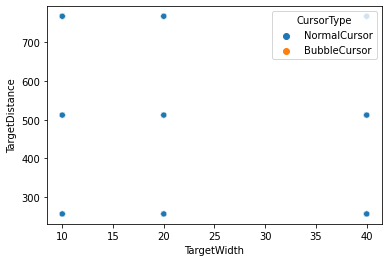

In [ ]:
sns.scatterplot(x = df['TargetWidth'],y= df['TargetDistance'],hue=df['CursorType'])

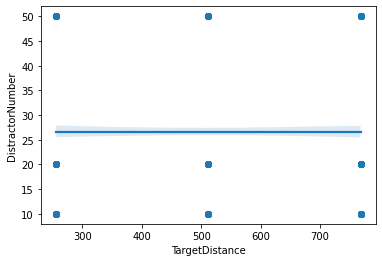

In [ ]:
sns.regplot(x = df['TargetDistance'],y= df['DistractorNumber'])

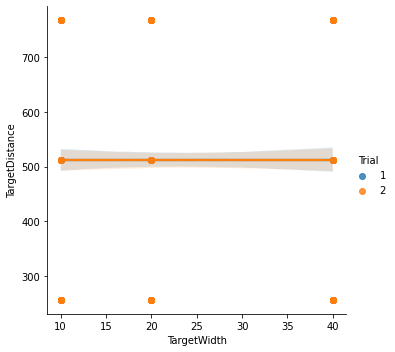

In [ ]:
sns.lmplot(x='TargetWidth',y='TargetDistance',hue='Trial',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


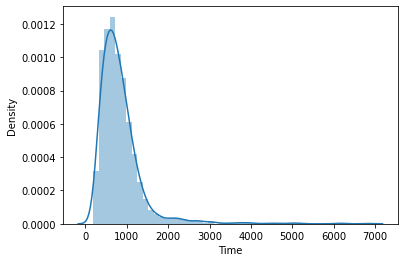

In [ ]:
sns.distplot(df['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


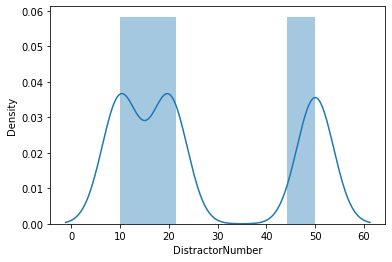

In [ ]:
sns.distplot(df['DistractorNumber'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


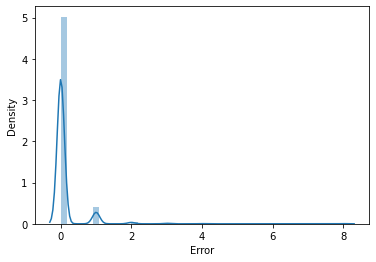

In [ ]:
sns.distplot(df['Error'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:

df.head()
X = df.drop(['Participant','CursorType'],axis = 1)
y = df['CursorType']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)



In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
model = [["LogisticRegression",LogisticRegression()],["RandomForestClassifier",RandomForestClassifier()],["DecisionTreeClassifier",DecisionTreeClassifier()],["GaussianNB",GaussianNB()],["KNeighborsClassifier",KNeighborsClassifier()]]

In [ ]:
accuracy_score1 = []
for i in model:
    log = i[1]
    log.fit(X_train,y_train)
    predict = log.predict(X_test)
    accuracy_score1.append([i[0],accuracy_score(predict,y_test)])    

In [ ]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Score"]

In [ ]:
main_score

,Model,Score
0,LogisticRegression,0.707165
1,RandomForestClassifier,0.629283
2,DecisionTreeClassifier,0.616822
3,GaussianNB,0.556075
4,KNeighborsClassifier,0.548287
